# Author: FBB

### This is a demo of the famous Anscombe's Quartet 
### developed BY Federica B Bianco, NYU @fedhere 
### for CUSP Principle of Urban Informatics. 

## The moral of the story is: look at your data!
### version 1: August 2015 
### last update: October 2018 


In [4]:
import os
import sys
import numpy as np
import pylab as pl

import json

s = json.load( open("fbb_matplotlibrc.json") )
pl.rcParams.update(s)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/__init__.py:800: MatplotlibDeprecationWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  mplDeprecation)


### lets read in a file which is not a regular csv file, called anscombe.txt, but let's use the pandas moduleand its read_csv function

In [6]:
import pandas as pd
if not os.path.isfile("anscombe.txt"):
    !curl -O https://raw.githubusercontent.com/fedhere/UInotebooks/master/anscombe.txt
pd.read_csv("anscombe.txt")

,Anscombe's Quartet
0,Anscombe-Data-Set I I II II III III IV IV
1,X Y X Y X Y X Y
2,10 8.04 10 9.14 10 7.46 8 6.58
3,8 6.95 8 8.14 8 6.77 8 5.76
4,13 7.58 13 8.74 13 12.74 8 7.71
5,9 8.81 9 8.77 9 7.11 8 8.84
6,11 8.33 11 9.26 11 7.81 8 8.47
7,14 9.96 14 8.1 14 8.84 8 7.04
8,6 7.24 6 6.13 6 6.08 8 5.25
9,4 4.26 4 3.1 4 5.39 19 12.5


notice that I used the link to github starting with raw: https://raw.githubusercontent.com/fedhere/UInotebooks/master/anscombe.txt. The page https://github.com/fedhere/UInotebooks/blob/master/anscombe.txt is an html file hosting the text for rendering. Downloading that would download an html file. Try it. 

## pandas organizes datasets in "data frames"

## lets read the file a little better by identifying what to use as header to name our variables

In [7]:
pd.read_csv("anscombe.txt", header = [1, 2], delimiter=' ')

Anscombe-Data-Set       I             II           III             IV  \
   Unnamed: 0_level_1       X      Y       X     Y       X      Y       X   
0                 NaN  10.000   8.04  10.000  9.14  10.000   7.46   8.000   
1                 NaN   8.000   6.95   8.000  8.14   8.000   6.77   8.000   
2                 NaN  13.000   7.58  13.000  8.74  13.000  12.74   8.000   
3                 NaN   9.000   8.81   9.000  8.77   9.000   7.11   8.000   
4                 NaN  11.000   8.33  11.000  9.26  11.000   7.81   8.000   
5                 NaN  14.000   9.96  14.000  8.10  14.000   8.84   8.000   
6                 NaN   6.000   7.24   6.000  6.13   6.000   6.08   8.000   
7                 NaN   4.000   4.26   4.000  3.10   4.000   5.39  19.000   
8                 NaN  12.000  10.84  12.000  9.13  12.000   8.15   8.000   
9                 NaN   7.000   4.82   7.000  7.26   7.000   6.42   8.000   
10                NaN   5.000   5.68   5.000  4.74   5.000   5.73   8.000   
11                NaN     NaN    NaN     NaN   NaN     NaN    NaN     NaN   
12                NaN   9.000   7.50   9.000  7.50   9.000   7.50   9.000   
13                NaN     NaN    NaN     NaN   NaN     NaN    NaN     NaN   
14                NaN  10.000   3.75  10.000  3.75  10.000   3.75  10.000   
15                NaN     NaN    NaN     NaN   NaN     NaN    NaN     NaN   
16                NaN   0.816    NaN   0.816   NaN   0.816    NaN   0.817   

          Unnamed: 9_level_0 Unnamed: 10_level_0  
        Y Unnamed: 9_level_1 Unnamed: 10_level_1  
0    6.58                NaN                 NaN  
1    5.76                NaN                 NaN  
2    7.71                NaN                 NaN  
3    8.84                NaN                 NaN  
4    8.47                NaN                 NaN  
5    7.04                NaN                 NaN  
6    5.25                NaN                 NaN  
7   12.50                NaN                 NaN  
8    5.56                NaN                 NaN  
9    7.91                NaN                 NaN  
10   6.89                NaN                 NaN  
11    NaN                NaN                 NaN  
12   7.50               Mean                 NaN  
13    NaN                NaN                 NaN  
14   3.75           Variance        (Population)  
15    NaN                NaN                 NaN  
16    NaN        Correlation           (Pearson)

## lets read the file a little better yet by only reading the rows we want 

In [8]:
pd.read_csv("anscombe.txt", header = [1, 2], nrows = 11, delimiter=' ')

Anscombe-Data-Set   I         II       III         IV         \
   Unnamed: 0_level_1   X      Y   X     Y   X      Y   X      Y   
0                 NaN  10   8.04  10  9.14  10   7.46   8   6.58   
1                 NaN   8   6.95   8  8.14   8   6.77   8   5.76   
2                 NaN  13   7.58  13  8.74  13  12.74   8   7.71   
3                 NaN   9   8.81   9  8.77   9   7.11   8   8.84   
4                 NaN  11   8.33  11  9.26  11   7.81   8   8.47   
5                 NaN  14   9.96  14  8.10  14   8.84   8   7.04   
6                 NaN   6   7.24   6  6.13   6   6.08   8   5.25   
7                 NaN   4   4.26   4  3.10   4   5.39  19  12.50   
8                 NaN  12  10.84  12  9.13  12   8.15   8   5.56   
9                 NaN   7   4.82   7  7.26   7   6.42   8   7.91   
10                NaN   5   5.68   5  4.74   5   5.73   8   6.89   

   Unnamed: 9_level_0 Unnamed: 10_level_0  
   Unnamed: 9_level_1 Unnamed: 10_level_1  
0                 NaN                 NaN  
1                 NaN                 NaN  
2                 NaN                 NaN  
3                 NaN                 NaN  
4                 NaN                 NaN  
5                 NaN                 NaN  
6                 NaN                 NaN  
7                 NaN                 NaN  
8                 NaN                 NaN  
9                 NaN                 NaN  
10                NaN                 NaN

## if we are happy lets save the data frame read by pandas
### (we could drop the columns we do not need after that, but I'm not gonna bother)

In [10]:
ansc = pd.read_csv("anscombe.txt", header = [1, 2], nrows = 11, delimiter=' ')
#fig=pl.figure(figsize=(10,10))

ansc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 11 columns):
(Anscombe-Data-Set, Unnamed: 0_level_1)       0 non-null float64
(I, X)                                        11 non-null int64
(I, Y)                                        11 non-null float64
(II, X)                                       11 non-null int64
(II, Y)                                       11 non-null float64
(III, X)                                      11 non-null int64
(III, Y)                                      11 non-null float64
(IV, X)                                       11 non-null int64
(IV, Y)                                       11 non-null float64
(Unnamed: 9_level_0, Unnamed: 9_level_1)      0 non-null float64
(Unnamed: 10_level_0, Unnamed: 10_level_1)    0 non-null float64
dtypes: float64(7), int64(4)
memory usage: 1.0 KB


## The dataframe is a class. In this case the class hosts 4 datasets: I,II,III,IV. We can think of the dataframe as a python dictionary as well. 
## If we think of it as a class lets refer to the first dataset identified as I as ansc.I
## Otherwise I can refer to it as a dictionary as ansc[I]

this structure propagates downward to elements of ansc.I too!

In [12]:
print (ansc.I)

     X      Y
0   10   8.04
1    8   6.95
2   13   7.58
3    9   8.81
4   11   8.33
5   14   9.96
6    6   7.24
7    4   4.26
8   12  10.84
9    7   4.82
10   5   5.68


In [13]:
print (ansc['I'])

     X      Y
0   10   8.04
1    8   6.95
2   13   7.58
3    9   8.81
4   11   8.33
5   14   9.96
6    6   7.24
7    4   4.26
8   12  10.84
9    7   4.82
10   5   5.68


In [14]:
ansc.describe()


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


Anscombe-Data-Set          I                    II             \
      Unnamed: 0_level_1          X          Y          X          Y   
count                0.0  11.000000  11.000000  11.000000  11.000000   
mean                 NaN   9.000000   7.500909   9.000000   7.500909   
std                  NaN   3.316625   2.031568   3.316625   2.031657   
min                  NaN   4.000000   4.260000   4.000000   3.100000   
25%                  NaN   6.500000   6.315000   6.500000   6.695000   
50%                  NaN   9.000000   7.580000   9.000000   8.140000   
75%                  NaN  11.500000   8.570000  11.500000   8.950000   
max                  NaN  14.000000  10.840000  14.000000   9.260000   

             III                    IV            Unnamed: 9_level_0  \
               X          Y          X          Y Unnamed: 9_level_1   
count  11.000000  11.000000  11.000000  11.000000                0.0   
mean    9.000000   7.500000   9.000000   7.500909                NaN   
std     3.316625   2.030424   3.316625   2.030579                NaN   
min     4.000000   5.390000   8.000000   5.250000                NaN   
25%     6.500000   6.250000   8.000000   6.170000                NaN   
50%     9.000000   7.110000   8.000000   7.040000                NaN   
75%    11.500000   7.980000   8.000000   8.190000                NaN   
max    14.000000  12.740000  19.000000  12.500000                NaN   

      Unnamed: 10_level_0  
      Unnamed: 10_level_1  
count                 0.0  
mean                  NaN  
std                   NaN  
min                   NaN  
25%                   NaN  
50%                   NaN  
75%                   NaN  
max                   NaN

# Lets Look at the first and second moment: mean and standard deviation

In [15]:
print("Distribution Means:               {0:.2f}, {1:.2f}, {2:.2f}, {3:.2f}"\
    .format(ansc.I.Y.mean(), ansc.II.Y.mean(), ansc.III.Y.mean(), ansc.IV.Y.mean()))
print("Distribution Standard Deviations: {0:.2f}, {1:.2f}, {2:.2f}, {3:.2f}"\
    .format(ansc.I.Y.std(), ansc.II.Y.std(), ansc.III.Y.std(), ansc.IV.Y.std()))


Distribution Means:               7.50, 7.50, 7.50, 7.50
Distribution Standard Deviations: 2.03, 2.03, 2.03, 2.03


# cool! they are identical! identical mean, identical standard deviation
# hence we are looking at the same distribution i guess. 

## let's fit a line to it

In [16]:
import statsmodels.api as sm
import statsmodels.formula.api as smf


lregmodels={}
pregmodels={}
for i,a in enumerate([ansc.I,ansc.II,ansc.III,ansc.IV]):
    #create x^2 column
    a['X2'] = a.X**2
    rm = sm.OLS(a.Y, sm.add_constant(a.X))
    lregmodels[i] = rm.fit()
    
    pregmodels[i] = smf.ols(formula='Y ~ X2 + X', data = a).fit()
    
    print ("linear regression slope {}".format(lregmodels[i].params))
    print ("polynomial regression slope {}".format(pregmodels[i].params))    

linear regression slope const    3.000091
X        0.500091
dtype: float64
polynomial regression slope Intercept    0.755068
X2          -0.031620
X            1.069252
dtype: float64
linear regression slope const    3.000909
X        0.500000
dtype: float64
polynomial regression slope Intercept   -5.995734
X2          -0.126713
X            2.780839
dtype: float64
linear regression slope const    3.002455
X        0.499727
dtype: float64
polynomial regression slope Intercept    5.111767
X2           0.029709
X           -0.035028
dtype: float64
linear regression slope const    3.001727
X        0.499909
dtype: float64
polynomial regression slope Intercept    0.178018
X2          -0.018577
X            1.001489
dtype: float64


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## the linear regression slopes are also the same to the third decimal digit! we must indeed be looking at the same distribution

## what other ways to see the data could help us understand what we are looking at? how about a boxplot?

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:14: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


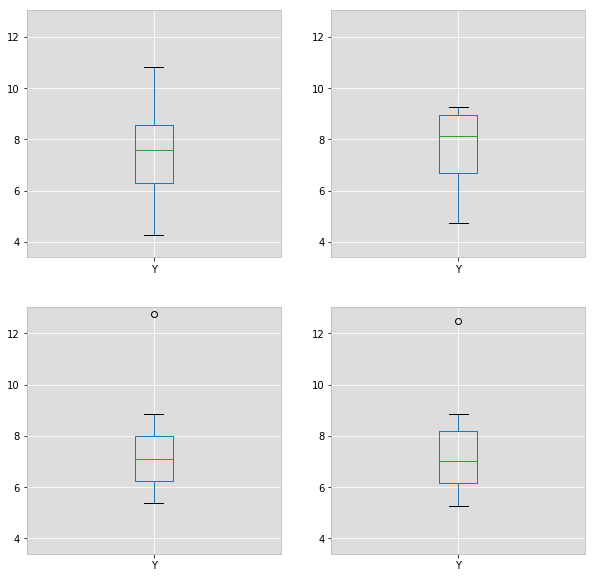

In [17]:
fig = pl.figure(figsize=(10,10))
ax = [0]*4

ax[0] = fig.add_subplot(221)
ax[1] = fig.add_subplot(222)
ax[2] = fig.add_subplot(223)
ax[3] = fig.add_subplot(224)
# setting y axis limits to the max and mean of each distribution
ylims = (min(np.concatenate([ansc.I.Y, ansc.II.Y, ansc.III.Y, ansc.IV.Y])) 
         + 0.3,
         max(np.concatenate([ansc.I.Y, ansc.II.Y, ansc.III.Y, ansc.IV.Y])) 
         + 0.3)
for i,a in enumerate([ansc.I, ansc.II, ansc.III, ansc.IV]):
    a.boxplot(column = 'Y', ax = ax[i])
    ax[i].set_ylim(ylims)
pl.show()

# hmmmm some differences are appearing. 

## lets make a histogram of the data. this is not much data but if we were looking at really large datasets histogramming rather then plotting the data directly may be necessary

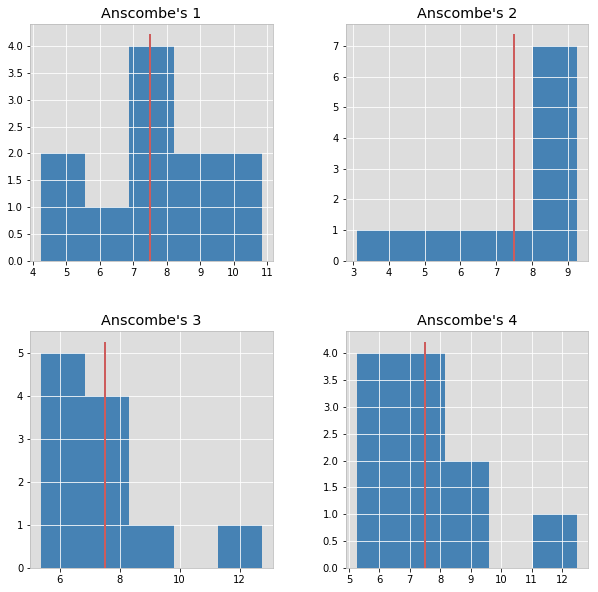

In [19]:
fig = pl.figure(figsize = (10,10))
ax=[0] * 4

ax[0] = fig.add_subplot(221)
ax[1] = fig.add_subplot(222)
ax[2] = fig.add_subplot(223)
ax[3] = fig.add_subplot(224)

for i, a in enumerate([ansc.I, ansc.II, ansc.III, ansc.IV]):
    #
    a.hist(column = 'Y', color = 'SteelBlue', bins = 5, ax = ax[i])
    ax[i].plot([a.Y.mean(), a.Y.mean()], ax[i].get_ylim(), '-', 
               color = 'IndianRed', lw = 2)
    ax[i].set_title("Anscombe's %d"%(i+1))
pl.show()

# lets plot the data itself... surprise!

3.00009090909 0.500090909091
3.00090909091 0.5
3.00245454545 0.499727272727
3.00172727273 0.499909090909


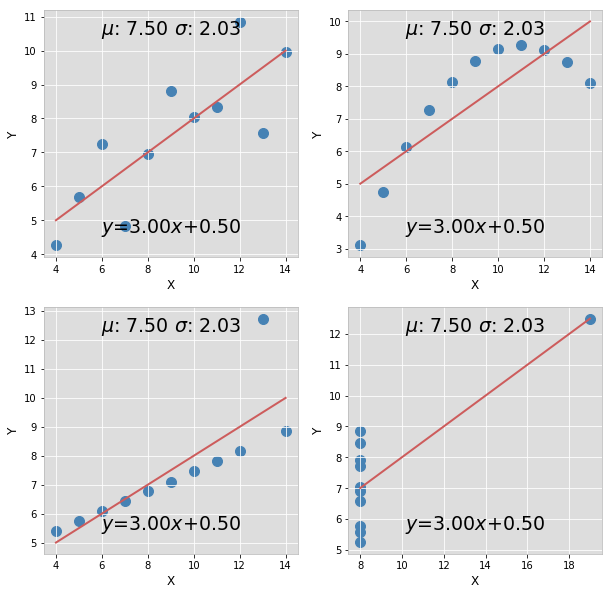

In [23]:
fig=pl.figure(figsize=(10,10))
ax=[0]*4

ax[0]=fig.add_subplot(221)
ax[1]=fig.add_subplot(222)
ax[2]=fig.add_subplot(223)
ax[3]=fig.add_subplot(224)

for i,a in enumerate([ansc.I,ansc.II,ansc.III,ansc.IV]):
    #
    a.plot(kind='scatter',s=100, x='X',y='Y', color='SteelBlue', ax=ax[i])
    xlims=ax[i].get_xlim()
    X_prime = sm.add_constant(np.linspace(a.X.min(), a.X.max(), 100))
    y_hat = lregmodels[i].predict(X_prime)
    print (*lregmodels[i].params)
    ax[i].plot(X_prime[:,1], y_hat, '-', color='IndianRed')  
    ax[i].text(0.5, 0.9, r"$\mu$: %.2f $\sigma$: %.2f"%(a.Y.mean(),
                                                        a.Y.std()), 
               horizontalalignment="center", transform=ax[i].transAxes, 
               fontsize=19)
    ax[i].text(0.5, 0.1, r"$y$={:.2f}$x$+{:.2f}".format(*lregmodels[i].params), 
               horizontalalignment="center", transform=ax[i].transAxes, 
               fontsize=19)
pl.savefig("anscombe.png")


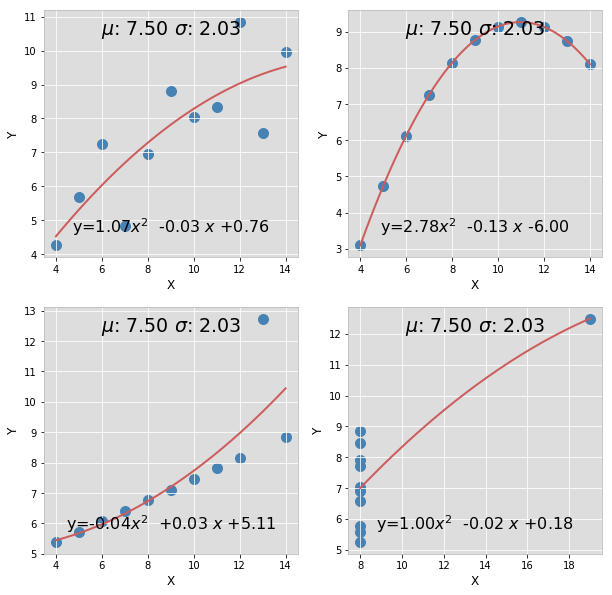

In [24]:
fig=pl.figure(figsize=(10,10))
ax=[0]*4

ax[0]=fig.add_subplot(221)
ax[1]=fig.add_subplot(222)
ax[2]=fig.add_subplot(223)
ax[3]=fig.add_subplot(224)

for i,a in enumerate([ansc.I,ansc.II,ansc.III,ansc.IV]):
    #
    a.plot(kind='scatter',s=100, x='X',y='Y', color='SteelBlue', ax=ax[i])
    xlims=ax[i].get_xlim()
    X_prime = np.linspace(a.X.min(), a.X.max(), 100)
    atmp = pd.DataFrame()
    atmp['X'] = X_prime
    atmp['X2'] = atmp['X']**2
    
    y_hat = pregmodels[i].predict(atmp)
    ax[i].plot(X_prime, y_hat, '-', color='IndianRed')  
    ax[i].text(0.5, 0.9, r"$\mu$: %.2f $\sigma$: %.2f"%(a.Y.mean(),a.Y.std()), 
               horizontalalignment="center", transform=ax[i].transAxes, fontsize=19)
    ax[i].text(0.5, 0.1, r"y={:.2f}$x^2$  {:+.2f} $x$ {:+.2f}".format(*pregmodels[i].params[::-1]), 
               horizontalalignment="center", transform=ax[i].transAxes, 
               fontsize=16)
pl.savefig("anscombe.png")


## note that the higher order moments also suggested differences

Distribution Skewness: -0.07, -1.32, 1.86, 1.51
Distribution Kurtosis: -0.53, 0.85, 4.38, 3.15


Text(0.5,0.75,'kurtosis')

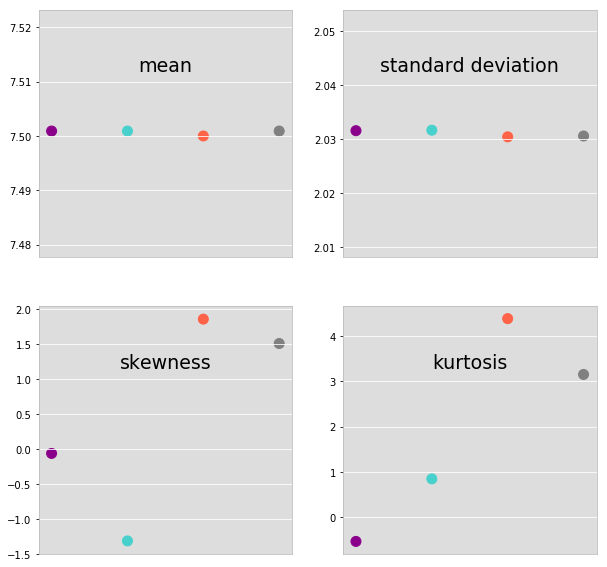

In [25]:
print ("Distribution Skewness: {0:.2f}, {1:.2f}, {2:.2f}, {3:.2f}"\
    .format(ansc.I.Y.skew(), ansc.II.Y.skew(), ansc.III.Y.skew(), ansc.IV.Y.skew()))
print ("Distribution Kurtosis: {0:.2f}, {1:.2f}, {2:.2f}, {3:.2f}"\
    .format(ansc.I.Y.kurt(), ansc.II.Y.kurt(), ansc.III.Y.kurt(), ansc.IV.Y.kurt()))

fig = pl.figure(figsize=(10, 10))
ax = [0] * 4

ax[0] = fig.add_subplot(221)
ax[1] = fig.add_subplot(222)
ax[2] = fig.add_subplot(223)
ax[3] = fig.add_subplot(224)
colors=['DarkMagenta', 'MediumTurquoise', 'tomato', 'gray']
for i in range(4):
    ax[i].set_xticks([],[])
ax[0].scatter(range(4), [ansc.I.Y.mean(), ansc.II.Y.mean(), ansc.III.Y.mean(), ansc.IV.Y.mean()], 
              s = 100, c = colors)
ax[0].text(0.5, 0.75, 'mean', horizontalalignment = "center", 
           transform = ax[0].transAxes, fontsize = 19)
ax[1].scatter(range(4), [ansc.I.Y.std(), ansc.II.Y.std(), ansc.III.Y.std(), ansc.IV.Y.std()], 
              s = 100, c = colors)
ax[1].text(0.5, 0.75, 'standard deviation', horizontalalignment = "center", 
           transform = ax[1].transAxes, fontsize = 19)
ax[2].scatter(range(4), [ansc.I.Y.skew(), ansc.II.Y.skew(), ansc.III.Y.skew(), ansc.IV.Y.skew()], 
              s = 100, c = colors)
ax[2].text(0.5, 0.75, 'skewness', horizontalalignment = "center", 
           transform = ax[2].transAxes, fontsize = 19)
ax[3].scatter(range(4), [ansc.I.Y.kurt(), ansc.II.Y.kurt(), ansc.III.Y.kurt(), ansc.IV.Y.kurt()], 
              s = 100, c = colors)
ax[3].text(0.5, 0.75, 'kurtosis', horizontalalignment = "center", 
           transform = ax[3].transAxes, fontsize = 19)


# what to the residual of the linear fit say?

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.99
Date:                Wed, 26 Sep 2018   Prob (F-statistic):            0.00217
Time:                        06:48:04   Log-Likelihood:                -16.841
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          3.0001      1.125      2.667      0.0

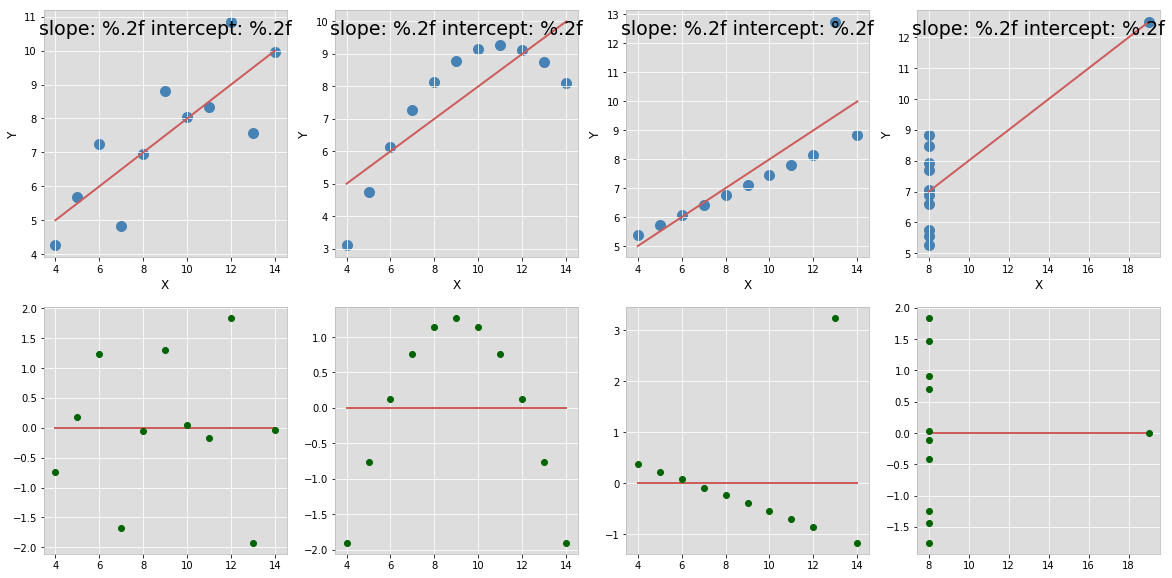

In [27]:
fig = pl.figure(figsize = (20, 10))
ax=[0] * 8

ax[0] = fig.add_subplot(241)
ax[1] = fig.add_subplot(242)
ax[2] = fig.add_subplot(243)
ax[3] = fig.add_subplot(244)
ax[4] = fig.add_subplot(245)
ax[5] = fig.add_subplot(246)
ax[6] = fig.add_subplot(247)
ax[7] = fig.add_subplot(248)

for i, a in enumerate([ansc.I, ansc.II, ansc.III, ansc.IV]):
    print (lregmodels[i].summary())
    a.plot(kind = 'scatter', s = 100, x = 'X', y = 'Y', 
           color = 'SteelBlue', ax = ax[i])
    xlims = ax[i].get_xlim()

    X_prime = sm.add_constant(np.linspace(a.X.min(), a.X.max(), 100))
    y_hat = lregmodels[i].predict(X_prime)
    ax[i].plot(X_prime[:, 1], y_hat, '-', color = 'IndianRed')  
    ax[i].text(0.5, 0.9, r"slope: %.2f intercept: %.2f"\
               .format(*lregmodels[i].params.values),
        horizontalalignment="center", transform = ax[i].transAxes, 
               fontsize = 19)
    ax[i + 4].plot([a.X.min(), a.X.max()], [0, 0], '-', 
                   color = 'IndianRed')
    ax[i + 4].plot(a.X, a.Y - lregmodels[i].predict(sm.add_constant(a.X)), 
                                                   'o', color='DarkGreen')
    ax[i + 4].set_xlim(xlims)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:21: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     8.793
Date:                Wed, 26 Sep 2018   Prob (F-statistic):            0.00956
Time:                        06:48:10   Log-Likelihood:                -16.487
No. Observations:                  11   AIC:                             38.97
Df Residuals:                       8   BIC:                             40.17
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.7551      3.288      0.230      0.8

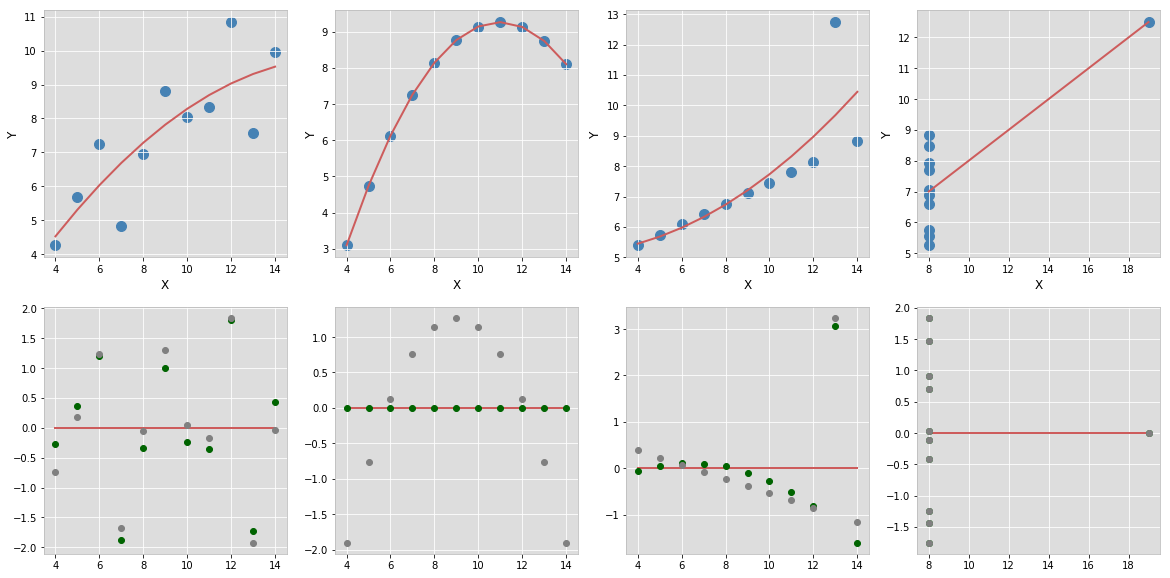

In [28]:
fig = pl.figure(figsize = (20, 10))
ax=[0] * 8

ax[0] = fig.add_subplot(241)
ax[1] = fig.add_subplot(242)
ax[2] = fig.add_subplot(243)
ax[3] = fig.add_subplot(244)
ax[4] = fig.add_subplot(245)
ax[5] = fig.add_subplot(246)
ax[6] = fig.add_subplot(247)
ax[7] = fig.add_subplot(248)


for i, a in enumerate([ansc.I, ansc.II, ansc.III, ansc.IV]):
    print (pregmodels[i].summary())
    a.plot(kind = 'scatter', s = 100, x = 'X', y = 'Y', 
           color = 'SteelBlue', ax = ax[i])
    xlims = ax[i].get_xlim()

    
    atmp = a.sort('X', axis=0)
    atmp['X2'] = atmp['X']*atmp['X']
    y_hatp = pregmodels[i].predict(atmp)    
    ax[i].plot(atmp.X, pregmodels[i].predict(atmp), 
                   '-', color='IndianRed')
    
    ax[i + 4].plot([a.X.min(), a.X.max()], [0, 0], '-', 
                   color = 'IndianRed')
    ax[i + 4].plot(atmp.X, atmp.Y - pregmodels[i].predict(atmp), 
                   'o', color='DarkGreen')
    ax[i + 4].plot(a.X, a.Y - lregmodels[i].predict(sm.add_constant(a.X)), 
                                                   'o', color='gray')
    ax[i + 4].set_xlim(xlims)
    